In [141]:
#Convex Hull Calculator
#The goal of this code is to take a set of points and output a list of the points
#that form the convex hull of the set.
#The input will be a set of points in the xy plane.  The output will be a list
#of points that form the convex hull, in clockwise order.
#I will use the good old random picker code to generate the initial list of
#points.


#The first step involves creating a large grid.

#import numpy

grid = []
cgrid = []


In [142]:
#The next step involves assigning points to random locations in the grid
#I will use my randomizer code from the Pcoket game for this

#Randomizer experiment
#The goal is to have a list of n items, and to be able to order them randomly
#My plan is to create a list of N random numbers, use the list index as the item
#number, and then use a sorting algorithm to pick the items from smallest random
#number to largest rather than by using their index.

from random import random

#list length
N = 10000

itemlist = []

i = 0
while i < N:
    itemlist.append(random())
    i += 1

#print(itemlist)
    
#Ok, have a list of random numbers, now must pick some number M items using sort
#I will use a selection sort, but instead of building a new sorted array I will
#simply toss the minimum value as it is no longer needed

#number of items to pick
M = 20

#list of picked points
gridpoints = []

i = 0
j = 0
pick = 0
while i < M:
    pick = itemlist[0]
    pickindex = 0
    j = 0
    while j < len(itemlist):
        if(itemlist[j] < pick):
            pick = itemlist[j]
            pickindex = j
        j += 1
    print(itemlist[pickindex],pickindex)
    gridpoints.append(pickindex)
    del itemlist[pickindex]
    i += 1

#That should do it

0.00011418408016850012 2130
0.0003733171563461424 748
0.00044787666381340685 5635
0.0006181089375622006 5487
0.0006347082150995886 8703
0.0006587305846433855 204
0.0007465854460267929 8616
0.0008051538492465093 9941
0.0009972124325063891 1602
0.000997678327831153 6628
0.0010117315480265843 8383
0.0010257308991987735 8140
0.0011445036451822599 1342
0.0011716786656297273 6033
0.001532355888485104 1287
0.0016359815084644458 194
0.0016572444353999405 9235
0.0016818236847279122 3513
0.0019165085022002648 2975
0.0019892183083463078 6512


In [143]:
#Ok, need to construct and display grid with points

#First need to, ironically, sort list of random values

i = 0
temp = 0
while i < (len(gridpoints)):
    j = 0
    while j < (len(gridpoints)-1):
        if gridpoints[j] > gridpoints[i]:
            temp = gridpoints[i]
            gridpoints[i] = gridpoints[j]
            gridpoints[j] = temp
        j += 1
    i+= 1

gridpoints          
        

[194,
 204,
 748,
 1287,
 1342,
 1602,
 2130,
 2975,
 3513,
 5487,
 5635,
 6033,
 6512,
 6628,
 8140,
 8383,
 8616,
 8703,
 9235,
 9941]

[[1, 94],
 [2, 4],
 [7, 48],
 [12, 87],
 [13, 42],
 [16, 2],
 [21, 30],
 [29, 75],
 [35, 13],
 [54, 87],
 [56, 35],
 [60, 33],
 [65, 12],
 [66, 28],
 [81, 40],
 [83, 83],
 [86, 16],
 [87, 3],
 [92, 35],
 [99, 41]]

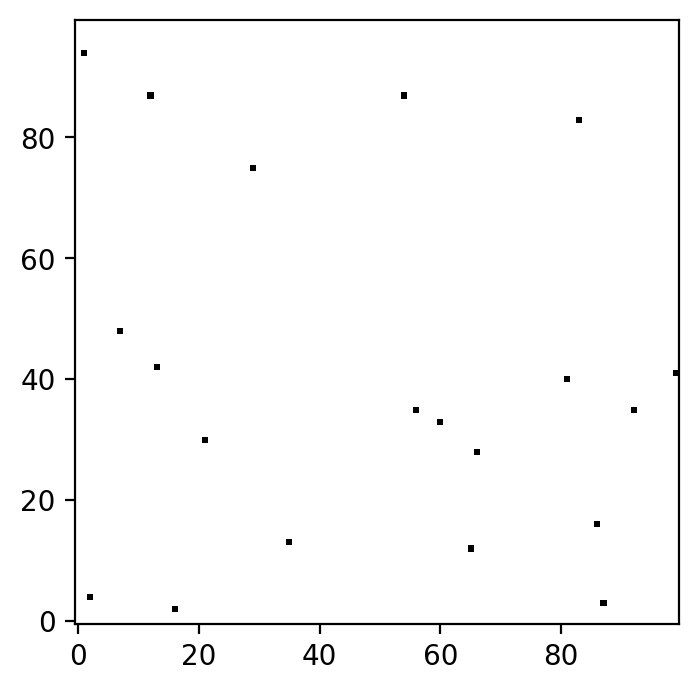

In [144]:
#Ok, now create grid display, fill with zeroes except at specified points in gridpoints list

#Go with simple approach, make a list of 100 rows of 100 points, then just count through to points and assign 1

coords = []
i = 0
while i < 100:
    j = 0
    dummy = []
    while j < 100:
        dummy.append(0)
        j += 1
    grid.append(dummy)
    #print(grid[i])
    i += 1    
    
h = 0
i = 0
j = 0
while j < 100:
    k = 0
    while k < 100:
        if i == gridpoints[h]:
            #print(gridpoints[h])
            grid[j][k] = 1
            copair = []
            copair.append(j)
            copair.append(k)
            coords.append(copair)
            h += 1
            if h == len(gridpoints):
                j = 100
                break
        k += 1
        i += 1
    j += 1

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*2
#plt.imshow(grid,cmap = 'Greys', extent = [0,100,0,100])
plt.imshow(numpy.transpose(grid),cmap = 'Greys', origin = 'lower')


coords

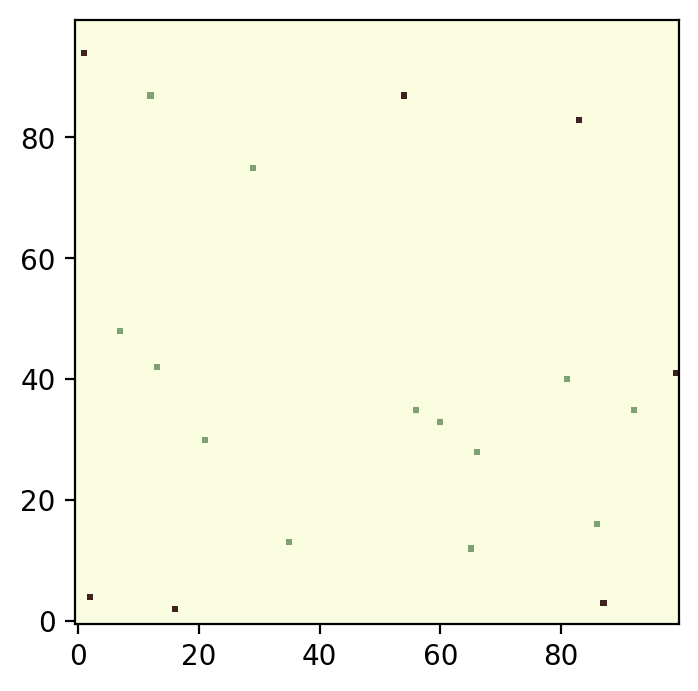

In [145]:
#Ok, have my points, now I can start working on the convex hull calculation
#The points are already sorted for display in the above cell, were they not
#the first step would be to sort them by x coordinate.

import math

Upperlist = []
Lowerlist = []

Upperlist.append(coords[0])
Upperlist.append(coords[1])

i = 2
while i < len(coords):
    Upperlist.append(coords[i])
    turn = 0
    while((len(Upperlist) > 2) and (turn == 0)):
        #Use p0 as origin, locate p1 and p2 relative
        #p0 = []
        p1 = []
        p2 = []
        p2.append(Upperlist[len(Upperlist)-1][0]-Upperlist[len(Upperlist)-1-2][0])
        p2.append(Upperlist[len(Upperlist)-1][1]-Upperlist[len(Upperlist)-1-2][1])
        p1.append(Upperlist[len(Upperlist)-1-1][0]-Upperlist[len(Upperlist)-1-2][0])
        p1.append(Upperlist[len(Upperlist)-1-1][1]-Upperlist[len(Upperlist)-1-2][1])
        #p0.append(0)
        #p0.append(0)
        #Ok, now p0 should be origin, p1 and p2 points relative to origin
        #Get angle of p1 with origin
        #degenerate fix
        if(p1[0] == 0):
            p1[0] = .00000001
        p1slope = p1[1]/p1[0]
        #create line y = mx + b, b here is 0, x is p2 x coordinate
        p2intercept = p2[0]*p1slope
        #if p2 y coordinate is less than or equal to p2intercept, right turn/straight, else left
        if(p2intercept <= p2[1]):
            #left turn, toss p1
            del Upperlist[len(Upperlist)-2]
            turn = 0
        else:
            turn = 1
    i += 1

#Ok, this gives the upper half, now need to repeat moving left to right for lower half
#First, need a reversed version of coords

revcoords = coords[::-1]

Lowerlist.append(revcoords[0])
Lowerlist.append(revcoords[1])

i = 2
while i < len(revcoords):
    Lowerlist.append(revcoords[i])
    turn = 0
    while((len(Lowerlist) > 2) and (turn == 0)):
        #Use p0 as origin, locate p1 and p2 relative
        #p0 = []
        p1 = []
        p2 = []
        p2.append(Lowerlist[len(Lowerlist)-1][0]-Lowerlist[len(Lowerlist)-1-2][0])
        p2.append(Lowerlist[len(Lowerlist)-1][1]-Lowerlist[len(Lowerlist)-1-2][1])
        p1.append(Lowerlist[len(Lowerlist)-1-1][0]-Lowerlist[len(Lowerlist)-1-2][0])
        p1.append(Lowerlist[len(Lowerlist)-1-1][1]-Lowerlist[len(Lowerlist)-1-2][1])
        #p0.append(0)
        #p0.append(0)
        #Ok, now p0 should be origin, p1 and p2 points relative to origin
        #Get angle of p1 with origin
        #degenerate fix
        if(p1[0] == 0):
            p1[0] = .00000001
        p1slope = p1[1]/p1[0]
        #create line y = mx + b, b here is 0, x is p2 x coordinate
        p2intercept = p2[0]*p1slope
        #if p2 y coordinate is greater than or equal to p2intercept, right turn/straight, else left
        if(p2intercept >= p2[1]):
            #left turn, toss p1
            del Lowerlist[len(Lowerlist)-2]
            turn = 0
        else:
            turn = 1
    i += 1
    
del Lowerlist[0]
del Lowerlist[len(Lowerlist)-1]
            
Totallist = []
Totallist = Upperlist+Lowerlist

#To display will need to sort list

Sortedlist = []
Sortedlist = Totallist

i = 0
temp = 0
while i < (len(Sortedlist)):
    j = 0
    while j < (len(Sortedlist)-1):
        if Sortedlist[j] > Sortedlist[i]:
            temp = Sortedlist[i]
            Sortedlist[i] = Sortedlist[j]
            Sortedlist[j] = temp
        j += 1
    i+= 1

    
#Create a new grid to display convex hull
i = 0
while i < 100:
    j = 0
    dummy = []
    while j < 100:
        dummy.append(0)
        j += 1
    cgrid.append(dummy)
    #print(grid[i])
    i += 1    
    
j = 0
while j < len(Sortedlist):
    cgrid[Sortedlist[j][0]][Sortedlist[j][1]] = .5
    j += 1
        
#This looks good, lets see if we can plot it on top of the other list
plt.imshow(numpy.transpose(grid),cmap = 'Greens', origin = 'lower')
plt.imshow(numpy.transpose(cgrid),cmap = 'YlOrRd', origin = 'lower', alpha = 0.5)

#Totallist gives the list of points in the convex hull in clockwise order, Sortedlist
#gives them in order sorted from smallest to largest x component
   